# REVIEWS AS A PREDICTOR OF SALES
###### By Rachel Nord, DS-SEA-07

## Background / Problem Statement
Reviews drive orders.  We know that products that have reviews and have high average rating of reviews sell better than those that don’t.  However, are there features in the ratings that are more likely to drive purchases than others?  And can we use these features to build a model that will predict orders placed?


## Data
### Data Import
I uploaded a csv file of from Bazaarvoice, the vendor we use to capture and enable user generated content on rei.com. The dimensions of this data are by average overall rating, total reviews, percent recommended to a friend, average estimated word count, percent of reviews that were 5-star, specialty shop, number of uploaded photos, price.

I then joined this data with data on orders placed, price of item, and each level of of REI's internal merchandising hierarchy (Specialty Shop, Department, Class, Subclass).

### Pre-processing Steps Taken


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 14


Most preprocessing was done in prior to the data import since I used SQL to join my two data sources.  At this point I calculated the standard deviation of the review scores for each product.  The Bazaarvoice data is based on a moment in time on 10/20/17.  So I filtered order and traffic data for the month of October.  I also created dummy variables for each specialty shop.

The end result was 18,297 different products and 37 different features to analyze.

In [2]:
# read in data
path = '/Users/rnord/GA Data Science/temp_repos/DS-SEA-07/project/'
url = path + 'Bazaar_by_product_TRAFFIC.csv'
prod = pd.read_csv(url, delimiter = '|')

# Add Standard Deviation
prod['STD'] = np.sqrt(prod['VARIANCE_'])

#Look at latest month
prod_oct = prod[prod['MONTH_CODE'] == 201710]




In [47]:

# Trying a subset of the data to see if this is more accurate
prod_oct_hikingfootwear = prod_oct[prod_oct['DEPARTMENT_DESC'] == 'HIKING FOOTWEAR']
prod_oct_packs = prod_oct[prod_oct['DEPARTMENT_DESC'] == 'PACKS']
prod_oct_cycling = prod_oct[prod_oct['SHOP_DESC'] == 'CYCLING']

### Features Used

In [4]:
prod_oct.columns


Index([u'MONTH_CODE', u'PRODUCT', u'SUBCLASS_DESC', u'CLASS_DESC',
       u'DEPARTMENT_DESC', u'SHOP_DESC', u'VISITS', u'ORDERS', u'CONVERSION',
       u'INDEX', u'PRODUCT_NAME', u'PRODUCT_ID', u'CATEGORY',
       u'AVERAGE_OVERALL_RATING', u'TOTAL_SUBMITTED__REVIEWS',
       u'TOTAL_SUBMITTED__RATINGS_ONLY_REVIEWS', u'PCT_RECOMMEND_TO_A_FRIEND',
       u'AVERAGE_EST_REVIEW_WORD_COUNT', u'PCT_5_STAR', u'PCT_4_STAR',
       u'PCT_3_STAR', u'PCT_2_STAR', u'PCT_1_STAR', u'TOTAL_HELPFULNESS_VOTES',
       u'PCT_YES', u'PCT_NO', u'NUM_UPLOADED_PHOTOS', u'NUM_UPLOADED_VIDEOS',
       u'PRODUCT.1', u'PRICE', u'REVIEWS_5', u'REVIEWS_4', u'REVIEWS_3',
       u'REVIEWS_2', u'REVIEWS_1', u'VARIANCE_', u'STD'],
      dtype='object')

### Response Variable
The response variable that was tested was `Orders`.

### Data Exploration
- Total number of reviews written for each product

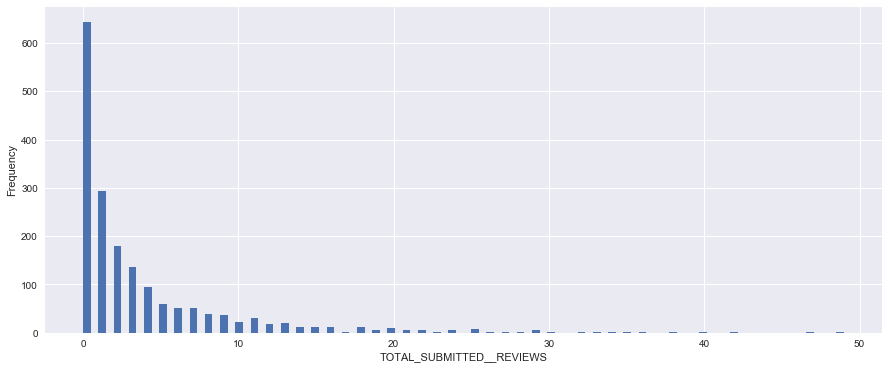

In [48]:
# Total Submitted Reviews
prod_oct_cycling.TOTAL_SUBMITTED__REVIEWS[prod_oct_cycling.TOTAL_SUBMITTED__REVIEWS < 50].plot(kind='hist', bins=100)
plt.xlabel('TOTAL_SUBMITTED__REVIEWS')
plt.ylabel('Frequency')

- Of all products currently available on rei.com, most have no reviews, followed by those with an average score of 5.

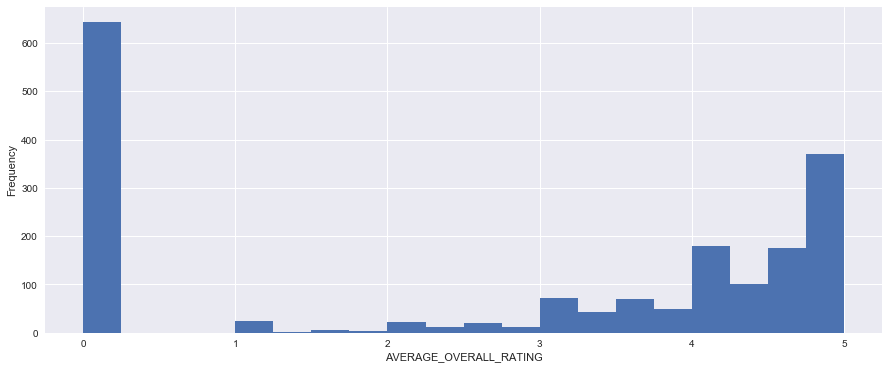

In [49]:
# Average Overall Rating
prod_oct_cycling.AVERAGE_OVERALL_RATING.plot(kind='hist', bins=20)
plt.xlabel('AVERAGE_OVERALL_RATING')
plt.ylabel('Frequency')

### Correlation Heat Map

Based on the below heatmap, the strongest correlation with orders and order conversion are percent of reviews recommended to friends, total reviews, especially the number of 5-star reviews, total helpfulness votes.

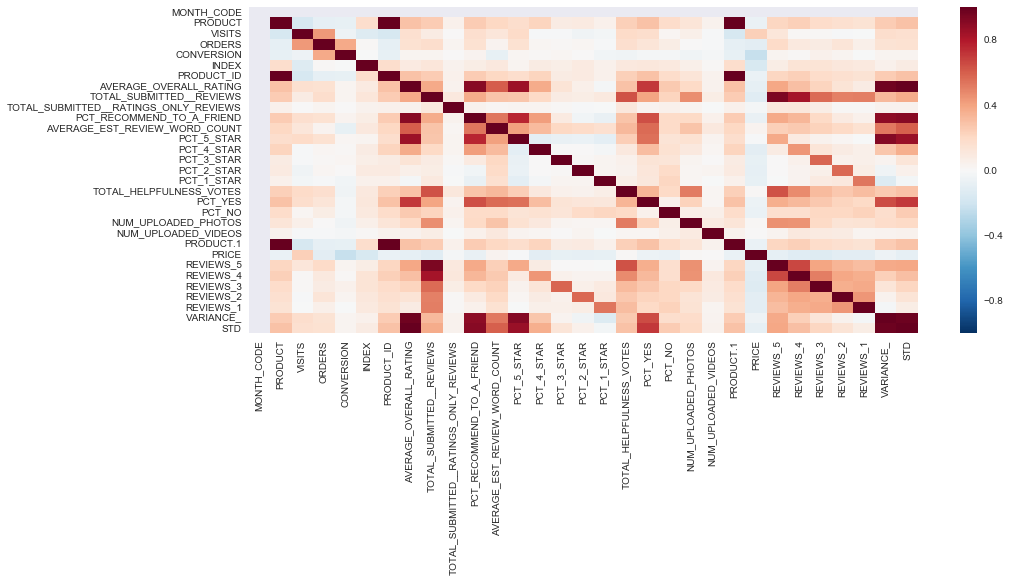

In [50]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(prod_oct_cycling.corr())

In [51]:
# create a list of features
feature_cols = ['AVERAGE_OVERALL_RATING', 'TOTAL_SUBMITTED__REVIEWS', 
                'TOTAL_SUBMITTED__RATINGS_ONLY_REVIEWS', 'PCT_RECOMMEND_TO_A_FRIEND',
                'AVERAGE_EST_REVIEW_WORD_COUNT', 'PCT_5_STAR', 'PCT_4_STAR', 'PCT_3_STAR', 'PCT_2_STAR', 'PCT_1_STAR', 
                'PCT_YES', 'PCT_NO', 'NUM_UPLOADED_PHOTOS', 'NUM_UPLOADED_VIDEOS', 'PRICE', 'REVIEWS_5', 
                'REVIEWS_4', 'REVIEWS_3', 'REVIEWS_2', 'REVIEWS_1', 'VARIANCE_', 'STD']



In [52]:
# Creation of feature matrix and response vector
# Importation of chosen estimato; instantiation into a variable
# Fit the model with the X and y

X = prod_oct_cycling[feature_cols]
y = prod_oct_cycling['ORDERS']

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:

# print the coefficients
print linreg.intercept_
print linreg.coef_


4.48243588209
[ -1.07715608e+02  -1.50999367e+01   4.44831602e+00   2.58891584e+00
  -8.94743946e-03   1.83227978e+01   7.53427337e+00   3.93706926e+00
  -3.38558096e+00   1.36730444e-01   1.20758335e+00   1.06077964e+00
  -1.13595561e+00  -1.98866855e+00  -1.69433030e-03   1.55256738e+01
   1.48124008e+01   1.49064989e+01   1.75885889e+01   1.47003914e+01
  -5.08978555e-01   5.38447525e+01]


In [54]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

[('AVERAGE_OVERALL_RATING', -107.71560826479579),
 ('TOTAL_SUBMITTED__REVIEWS', -15.099936691737824),
 ('TOTAL_SUBMITTED__RATINGS_ONLY_REVIEWS', 4.4483160185814983),
 ('PCT_RECOMMEND_TO_A_FRIEND', 2.5889158417269433),
 ('AVERAGE_EST_REVIEW_WORD_COUNT', -0.0089474394602753193),
 ('PCT_5_STAR', 18.322797779723437),
 ('PCT_4_STAR', 7.5342733715658596),
 ('PCT_3_STAR', 3.9370692609119349),
 ('PCT_2_STAR', -3.3855809636384988),
 ('PCT_1_STAR', 0.13673044419294822),
 ('PCT_YES', 1.2075833456697977),
 ('PCT_NO', 1.060779643649016),
 ('NUM_UPLOADED_PHOTOS', -1.1359556137895943),
 ('NUM_UPLOADED_VIDEOS', -1.9886685540114681),
 ('PRICE', -0.0016943302961287543),
 ('REVIEWS_5', 15.525673766278626),
 ('REVIEWS_4', 14.81240078404528),
 ('REVIEWS_3', 14.906498914081997),
 ('REVIEWS_2', 17.588588866404841),
 ('REVIEWS_1', 14.700391359940639),
 ('VARIANCE_', -0.50897855513772594),
 ('STD', 53.844752497998996)]

The most impactful features are:

- Holding all other features fixed, a 1 unit increase in **Pct 5-Star Reviews** is associated with an **order increase of 257 products**.
- Holding all other features fixed, a 1 unit increase in **Average Overall Rating** is associated with a **order increase of 53 products**.
- Holding all other features fixed, a 1 unit increase in **REI Garage Prodcut** is associated with a **order increase of 19 products**.

## Modeling

### Simple Linear Regression
I first ran a simple linear regression model to get a sense of the null RSME.

In [55]:
#from sklearn.cross_validation import train_test_split # deprecated syntax
from sklearn.model_selection import train_test_split
from sklearn import metrics


# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = prod_oct_cycling[feature_cols]
    y = prod_oct_cycling['ORDERS']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))


In [56]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
#y_null


In [57]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

12.744714826510078

Changing the random state in the test/train split gave me a null RSME ranging from **34 to 40**.


### Cross Validation

I next used a 10-fold cross-validation to calculate the RMSE for the linear regression model.  The RMSE when using all features was 36.81. 

In [58]:
# save the 10 MSE scores output by cross_val_score
from sklearn.model_selection import cross_val_score
mse_scores = cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')
print mse_scores
print np.mean(np.sqrt(-mse_scores))

[ -62.59360667 -298.0840909   -55.60974701  -78.99949388 -107.47068817
 -120.53071715  -58.76098967 -169.72716158 -106.08111189 -789.39525234]
12.1956796215


Then I tuned my model, attempting to increase the accuracy by excluding some of the features from the model.
Of the models I ran, this was the only one that beat the cross-validation model with all features included:
- 'PCT_RECOMMEND_TO_A_FRIEND'
- 'AVERAGE_EST_REVIEW_WORD_COUNT' 
- 'PCT_YES'
- 'PCT_NO'
- 'PRICE'
- 'REVIEWS_5' 
- 'REVIEWS_4'
- 'REVIEWS_1'


In [59]:
# 10-fold cross-validation with best test-train features
# this was the best combo I could find.
feature_cols = [ 'PCT_RECOMMEND_TO_A_FRIEND',
                'AVERAGE_EST_REVIEW_WORD_COUNT', 
                'PCT_YES', 'PCT_NO', 'PRICE', 'REVIEWS_5', 
                'REVIEWS_4', 'REVIEWS_1']
X = prod_oct_cycling[feature_cols]

mse_scores = cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')
print mse_scores
print np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean()

[ -52.88402912 -301.07871059  -58.09403173  -78.26627027 -116.45551895
 -126.05254047  -50.58728094 -168.62022174 -100.17202035 -796.31544868]
12.143681289


### Polynomial Regression

In [62]:
# Training Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly_reg = PolynomialFeatures(degree = 2)


#X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X, y)

def train_test_rmse_poly(prod_oct_cycling, feature_cols, random_state=123):
    X = prod_oct_cycling[feature_cols]
    y = prod_oct_cycling['ORDERS']
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    poly_feature = PolynomialFeatures(degree = 2)
    X_train_poly = poly_feature.fit_transform(X_train)
    X_test_poly = poly_feature.fit_transform(X_test)
    linreg = LinearRegression()
    linreg.fit(X_train_poly, y_train)
    y_pred = linreg.predict(X_test_poly)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [63]:
feature_columns = ['PCT_RECOMMEND_TO_A_FRIEND',
                'AVERAGE_EST_REVIEW_WORD_COUNT', 
                'PCT_YES', 'PCT_NO', 'PRICE', 'REVIEWS_5', 
                'REVIEWS_4', 'REVIEWS_1']
print train_test_rmse_poly(prod_oct_cycling, feature_columns)

11.4242340769


### Decision Tree

Use 10-fold cross-validation to evaluate a decision tree model

In [64]:
from sklearn.tree import DecisionTreeRegressor
# list of values to try
max_depth_range = range(1, 8)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use CV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

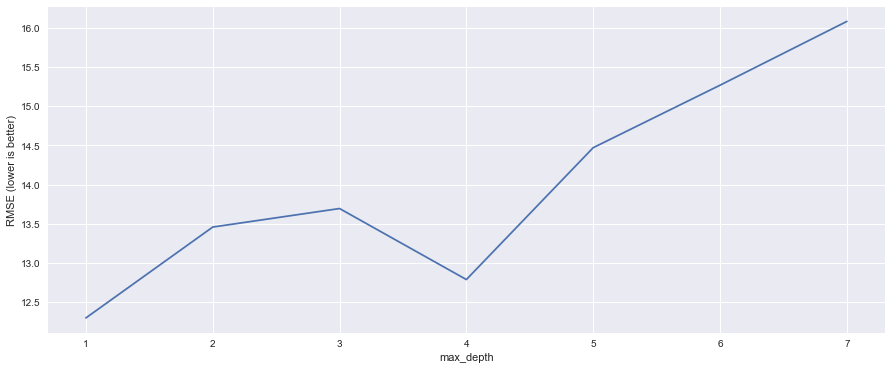

In [65]:
# plot max_depth (x-axis) versus RMSE (y-axis)

plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [66]:
# fit a decision tree model with "max_depth=3"
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)

scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores_t = np.mean(np.sqrt(-scores))
np.mean(rmse_scores_t)

12.293973743870868

So it appears that the best model I can use is a decision tree with a depth of 4, as the RSME is the lowest of all.  This is still less accurate than my null RSME.

## Conclusion

The Root Squared Mean Error for each model/best model tune were:

- Cross Validation linear regression: **39.023**
- Best Cross Validation model produced, based on features used: **36.773**
- Linear regression using Dimensionality Reduction: **38.373**
- Best Decision Tree model: **37.243**

The best model I produced in terms of lowest RSME was a Cross Validation model using select features: 
- 'PCT_RECOMMEND_TO_A_FRIEND'
- 'AVERAGE_EST_REVIEW_WORD_COUNT' 
- 'PCT_YES'
- 'PCT_NO'
- 'PRICE'
- 'REVIEWS_5' 
- 'REVIEWS_4'
- 'REVIEWS_1'
- 'shop_CAMPING' 
- 'shop_CLIMBING'
- 'shop_CYCLING'
- 'shop_MISCELLANEOUS' 
- 'shop_OUTDOOR ESSENTIALS'
- 'shop_REI GARAGE'
- 'shop_SNOWSPORTS'
- 'shop_TRAVEL' 
- 'shop_WATERSPORTS' 
                
Still, this model did not produce results much more accurate than the Null simple linear regression.  None of the features I looked at were very highly correlated with orders placed.  With the data I have available, we cannot produce a model that will predict orders placed with much accuracy.  

A next step would be to explore the content of the reviews to see if perhaps there is a correlation between content and orders placed.